# Задание 



  -  Выберите набор данных (датасет) для решения задачи классификации или регрессии.
  -  В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
  -  С использованием метода train_test_split разделите выборку на обучающую и тестовую.
  -  Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.
  -  Произведите подбор гиперпараметра K с использованием GridSearchCV и RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели. Используйте не менее двух стратегий кросс-валидации.
  - Сравните метрики качества исходной и оптимальной моделей.

Выбранный датасет (алмазы):
Содержание:
- Цена в долларах США ($326--$18,823)
- Карат  (0.2--5.01)
- Качество обрезки (Низкое, Хорошее, Очень хорошее, Премиум, Идеальное)
- Цвет бриллианта, от J (худший) до D (лучший)
- Измерение прозрачности бриллианта (I1 (худшее), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (лучшее))
- X длина в мм (0--10.74)
- Y ширина в мм (0--58.9)
- Z глубина в мм (0--31.8)
- Общий процент глубины = z / среднее(x, y) = 2 * z / (x + y) (43--79)
- Ширина вершины бриллианта относительно самой широкой точки (43--95)

In [197]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [241]:
data = pd.read_csv('diamonds.csv')

In [242]:
data = data.drop(columns=['id'])

In [243]:
data.shape, data.price.shape

((53940, 10), (53940,))

In [244]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [245]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Пропущенных значений нет

In [246]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Закодируем категориальные признаки

In [247]:
cut_order = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_order = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_order = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
data['cut_encoded'] = data['cut'].map(cut_order)
data['color_encoded'] = data['color'].map(color_order)
data['clarity_encoded'] = data['clarity'].map(clarity_order)
df_encoded = data.drop(columns=['cut', 'color', 'clarity'])
print(df_encoded)

       carat  depth  table  price     x     y     z  cut_encoded  \
0       0.23   61.5   55.0    326  3.95  3.98  2.43            4   
1       0.21   59.8   61.0    326  3.89  3.84  2.31            3   
2       0.23   56.9   65.0    327  4.05  4.07  2.31            1   
3       0.29   62.4   58.0    334  4.20  4.23  2.63            3   
4       0.31   63.3   58.0    335  4.34  4.35  2.75            1   
...      ...    ...    ...    ...   ...   ...   ...          ...   
53935   0.72   60.8   57.0   2757  5.75  5.76  3.50            4   
53936   0.72   63.1   55.0   2757  5.69  5.75  3.61            1   
53937   0.70   62.8   60.0   2757  5.66  5.68  3.56            2   
53938   0.86   61.0   58.0   2757  6.15  6.12  3.74            3   
53939   0.75   62.2   55.0   2757  5.83  5.87  3.64            4   

       color_encoded  clarity_encoded  
0                  5                1  
1                  5                2  
2                  5                4  
3                  1   

Разделим выборку на обучающую и тестовую

In [248]:
from sklearn.model_selection import train_test_split

Выделим вектор переменных целевого признака, и матрицу признаков(без целевого)

In [249]:
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]

In [250]:
print(X.head(), "\n")
print(y.head())

   carat  depth  table     x     y     z  cut_encoded  color_encoded  \
0   0.23   61.5   55.0  3.95  3.98  2.43            4              5   
1   0.21   59.8   61.0  3.89  3.84  2.31            3              5   
2   0.23   56.9   65.0  4.05  4.07  2.31            1              5   
3   0.29   62.4   58.0  4.20  4.23  2.63            3              1   
4   0.31   63.3   58.0  4.34  4.35  2.75            1              0   

   clarity_encoded  
0                1  
1                2  
2                4  
3                3  
4                1   

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64


In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [292]:
X_train.shape, y_train.shape,

((40455, 9), (40455,))

In [293]:
X_test.shape, y_test.shape

((13485, 9), (13485,))

Обучение модели ближайших соседей для произвольно заданного гиперпараметра K. Оценка качества модели с помощью подходящих для задачи метрик.

In [211]:
from sklearn.neighbors import KNeighborsRegressor

In [327]:
clf = KNeighborsRegressor(n_neighbors=2, weights='distance')  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
len(y_pred), y_pred

(13485,
 array([  925.24900458, 12737.63908297,  8511.28378792, ...,
          448.57625998,  4477.75121683,  3341.67269561]))

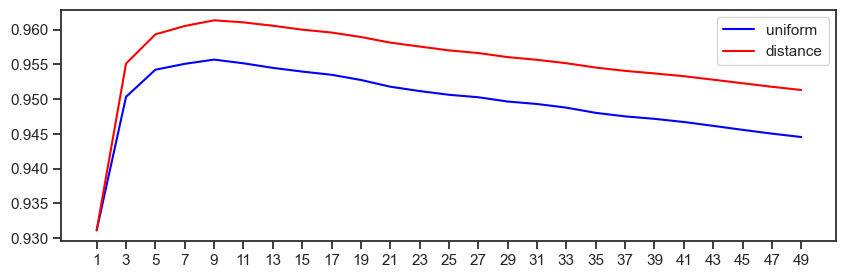

In [328]:
uniform  = []
distance = []
r = range (1,50,2)

for k in r:

    model = KNeighborsRegressor(n_neighbors = k, weights='uniform')
    model.fit(X_train.values, y_train.values)
    uniform.append(model.score(X_test.values,y_test.values))

    model = KNeighborsRegressor(n_neighbors = k, weights='distance') 
    model.fit(X_train.values, y_train.values)
    distance.append(model.score(X_test.values,y_test.values))

uniform = np.array(uniform)
distance = np.array(distance)

plt.rcParams['figure.figsize'] = [10, 3]
plt.rcParams['figure.dpi'] = 100 
plt.plot(r,uniform,label='uniform',color='blue')
plt.plot(r,distance,label='distance',color='red')
plt.legend()
plt.gca().set_xticks(r)
plt.show()

In [325]:
performance = clf.score(X_test, y_test)
print("R-squared:", performance)

R-squared: 0.9613677688121631


In [299]:
y_test.head()

36681     951
21314    9467
19527    8162
41099    1193
446      2816
Name: price, dtype: int64

Оценим качество модели

In [213]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [326]:
# Вычисление средней абсолютной ошибки
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Вычисление средней квадратичной ошибки
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Вычисление коэффициента детерминации
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Mean Absolute Error: 406.67656747522767
Mean Squared Error: 607296.743443547
R-squared Score: 0.9613677688121631


## Подбор гиперпараметра K с использованием GridSearchCV и RandomizedSearchCV и кросс-валидации, оценка качество оптимальной модели.

### GridSearchCV

In [373]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, median_absolute_error

In [347]:

knn = KNeighborsRegressor()

# Задаем пространство поиска гиперпараметра K для GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21)}

# Задаем пространство поиска гиперпараметра K для RandomizedSearchCV
param_dist = {'n_neighbors': np.random.randint(1, 21, 10)}


r2_scorer = make_scorer(r2_score)

In [338]:
# Используем GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring=r2_scorer)
grid_search.fit(X_train, y_train)

# Получаем оптимальное значение гиперпараметра K
optimal_k_grid = grid_search.best_params_['n_neighbors']


In [340]:
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая оценка метрики R2 или коэффициента детерминации:", grid_search.best_score_)

Лучшие параметры: {'n_neighbors': 9}
Лучшая оценка метрики R2 или коэффициента детерминации: 0.9526600872473179


In [341]:
print("Результаты кросс-валидации:")
print(grid_search.cv_results_)


Результаты кросс-валидации:
{'mean_fit_time': array([0.1085022 , 0.10404367, 0.10403903, 0.10638301, 0.10204918,
       0.10069633, 0.09906824, 0.09914663, 0.09735172, 0.09855745,
       0.1003993 , 0.09969926, 0.09996309, 0.09849248, 0.09737835,
       0.09903681, 0.0973134 , 0.09934928, 0.09852107, 0.09874332]), 'std_fit_time': array([0.00769161, 0.00414335, 0.00500939, 0.00609617, 0.00437521,
       0.00332693, 0.00289201, 0.00366959, 0.00188539, 0.00377323,
       0.00329007, 0.00242015, 0.00346619, 0.0023429 , 0.0041152 ,
       0.00310962, 0.00279855, 0.00232849, 0.00244531, 0.0027294 ]), 'mean_score_time': array([0.08517904, 0.10097377, 0.11486745, 0.13026521, 0.13429415,
       0.13607726, 0.14413972, 0.15034356, 0.15689492, 0.16615698,
       0.17536936, 0.18166037, 0.18623803, 0.19213808, 0.19005504,
       0.20197661, 0.20356922, 0.21716609, 0.21624475, 0.21974146]), 'std_score_time': array([0.0212339 , 0.0191354 , 0.01217399, 0.01222602, 0.01864185,
       0.00905513, 0.005

In [343]:
print("\nСредние значения метрики по кросс-валидации:")
print(grid_search.cv_results_['mean_test_score'])



Средние значения метрики по кросс-валидации:
[0.92869659 0.94380754 0.94768957 0.95014479 0.95121574 0.95217575
 0.95258067 0.95257989 0.95266009 0.95246186 0.95247091 0.95248767
 0.95240971 0.95208923 0.95175315 0.95150174 0.95129916 0.95105917
 0.9507352  0.9503912 ]


In [344]:
print("\nСтандартное отклонение метрики по кросс-валидации:")
print(grid_search.cv_results_['std_test_score'])


Стандартное отклонение метрики по кросс-валидации:
[0.00344471 0.00330433 0.00284791 0.00310319 0.00313897 0.00323471
 0.00313772 0.00327464 0.00323875 0.00341898 0.00357549 0.00358139
 0.00343943 0.00347103 0.00353216 0.00363867 0.00361787 0.00365312
 0.00369213 0.00369498]


Изменение качества на тестовой выборке в зависимости от К-соседей:

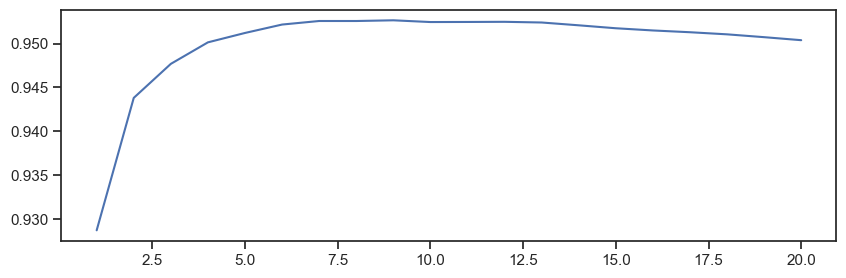

In [345]:
plt.plot(np.arange(1, 21), grid_search.cv_results_['mean_test_score'])

### RandomizedSearchCV 

In [358]:
# Используем RandomizedSearchCV
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=50, cv=55, scoring=r2_scorer, random_state=42)
random_search.fit(X_train, y_train)

# Получаем оптимальное значение гиперпараметра K
optimal_k_random = random_search.best_params_['n_neighbors']


In [360]:
print("Лучшие параметры:", random_search.best_params_)
print("Лучшая оценка метрики R2 или коэффициента детерминации:", random_search.best_score_)

Лучшие параметры: {'n_neighbors': 8}
Лучшая оценка метрики R2 или коэффициента детерминации: 0.9533990404851695


In [361]:
print("Результаты кросс-валидации:")
print(random_search.cv_results_)

Результаты кросс-валидации:
{'mean_fit_time': array([0.11318849, 0.1080952 , 0.10698977, 0.10584924, 0.10788989,
       0.10667898, 0.10665126, 0.10618365, 0.10682839, 0.10788258]), 'std_fit_time': array([0.00621268, 0.00306353, 0.00232603, 0.00251934, 0.0044041 ,
       0.00285658, 0.00386986, 0.00211016, 0.00346489, 0.00392655]), 'mean_score_time': array([0.04273197, 0.04232989, 0.04652317, 0.02804781, 0.0414495 ,
       0.02876669, 0.02469715, 0.04246769, 0.03166675, 0.03615788]), 'std_score_time': array([0.01029132, 0.00323271, 0.00839009, 0.00202944, 0.00718782,
       0.00246087, 0.00282423, 0.00294758, 0.00214678, 0.01059235]), 'param_n_neighbors': masked_array(data=[11, 16, 20, 6, 14, 6, 4, 17, 8, 10],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 11}, {'n_neighbors': 16}, {'n_neighbors': 20}, {'n_neighbors': 6}, {'n_neighbors': 14}, {'n_ne

In [362]:
print("\nЛучшая модель:")
print(random_search.best_estimator_)


Лучшая модель:
KNeighborsRegressor(n_neighbors=8)


In [363]:
print("\nСредние значения метрики по кросс-валидации:")
print(random_search.cv_results_['mean_test_score'])


Средние значения метрики по кросс-валидации:
[0.95324991 0.95240618 0.95137856 0.95299542 0.95306692 0.95299542
 0.95123456 0.95213237 0.95339904 0.95321412]


In [364]:
print("\nСтандартное отклонение метрики по кросс-валидации:")
print(random_search.cv_results_['std_test_score'])


Стандартное отклонение метрики по кросс-валидации:
[0.00807953 0.00834954 0.00833906 0.0075446  0.00826921 0.0075446
 0.00760457 0.00846991 0.00806192 0.00794229]


### Построение оптимальной модели (k = 9)

In [369]:
clf_o = KNeighborsRegressor(n_neighbors=9, weights='distance')  
clf_o.fit(X_train, y_train)
target_o = clf_o.predict(X_test)
len(target_o), target_o

(13485,
 array([  877.63538768, 12076.38323041,  8815.15857298, ...,
          497.15657555,  4681.69322114,  4712.86591814]))

## Сравнение метрик качества исходной и оптимальной моделей.

In [376]:
# Вычисление средней абсолютной ошибки
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Вычисление средней квадратичной ошибки
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

med_abs_err = median_absolute_error(y_test, y_pred)
print("Медианное абсолютное отклонение:", med_abs_err)

# Вычисление коэффициента детерминации
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Mean Absolute Error: 463.09288870425587
Mean Squared Error: 791758.8895621457
Медианное абсолютное отклонение: 180.38219030615574
R-squared Score: 0.9496334982908843


In [375]:
# Вычисление средней абсолютной ошибки
mae = mean_absolute_error(y_test, target_o)
print("Средняя абсолютная ошибка:", mae)

# Вычисление средней квадратичной ошибки
mse = mean_squared_error(y_test, target_o)
print("Средняя квадратичная ошибка:", mse)

med_abs_err = median_absolute_error(y_test, target_o)
print("Медианное абсолютное отклонение:", med_abs_err)

# Вычисление коэффициента детерминации
r2 = r2_score(y_test, target_o)
print("Метрика R2 или коэффициент детерминации:", r2)

Средняя абсолютная ошибка: 406.67656747522767
Средняя квадратичная ошибка: 607296.743443547
Медианное абсолютное отклонение: 170.3296485643491
Метрика R2 или коэффициент детерминации: 0.9613677688121631
